<a href="https://colab.research.google.com/github/Sameer103/pixel_coordinate_prediction/blob/main/pixel_coordinate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Using Deep Learning techniques, predict the coordinates (x,y) of a pixel which has a value of
255 for 1 pixel in a given 50x50 pixel grayscale image and all other pixels are 0. The pixel with avalue of 255 is randomly assigned. You may generate a dataset as required for solving the problem. Please explain your rationale behind dataset choices.



In [ ]:

pip install numpy matplotlib tensorflow scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split



##Generating the Dataset
---




In [3]:
def generate_dataset(num_images):
    images = []
    labels = []
    for _ in range(num_images):
        img = np.zeros((50, 50), dtype=np.uint8)
        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)
        img[x, y] = 255
        images.append(img)
        labels.append([x, y])
    return np.array(images), np.array(labels)

In [4]:
# Generating dataset of 10000 images
num_images = 10000
images, labels = generate_dataset(num_images)


In [5]:
# training and testing sets
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [6]:
# Reshaping the imgaes for the CNN
images_train = images_train.reshape((images_train.shape[0], 50, 50, 1))
images_test = images_test.reshape((images_test.shape[0], 50, 50, 1))

In [7]:
# Building the model to create the linear stack layer
# And Output layer with 2 neurons for (x, y) coordinates
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])


In [8]:
#Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 128)               17334400  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17353474 (66.20 MB)
Trainable params: 17353474 (66.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Training the model
history = model.fit(images_train, labels_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 124s 616ms/step - loss: 43.5201 - accuracy: 0.9252 - val_loss: 5.0786 - val_accuracy: 0.9556
Epoch 2/10
200/200 [==============================] - 125s 626ms/step - loss: 3.4337 - accuracy: 0.9608 - val_loss: 2.7006 - val_accuracy: 0.9669
Epoch 3/10
200/200 [==============================] - 128s 639ms/step - loss: 2.2596 - accuracy: 0.9711 - val_loss: 2.2282 - val_accuracy: 0.9731
Epoch 4/10
200/200 [==============================] - 126s 626ms/step - loss: 1.7619 - accuracy: 0.9748 - val_loss: 1.5738 - val_accuracy: 0.9812
Epoch 5/10
200/200 [==============================] - 126s 629ms/step - loss: 1.6092 - accuracy: 0.9794 - val_loss: 1.7362 - val_accuracy: 0.9869
Epoch 6/10
200/200 [==============================] - 123s 618ms/step - loss: 1.1295 - accuracy: 0.9841 - val_loss: 1.2267 - val_accuracy: 0.9844
Epoch 7/10
200/200 [==============================] - 132s 657ms/step - loss: 1.0733 - accuracy: 0.9825 - val_loss: 0.9639 

In [10]:
# Evaluation of the model
loss, accuracy = model.evaluate(images_test, labels_test)
print(f'Test accuracy: {accuracy}')


63/63 [==============================] - 5s 84ms/step - loss: 1.3535 - accuracy: 0.9790
Test accuracy: 0.9789999723434448


In [11]:
# Prediction on test set
predictions = model.predict(images_test)

63/63 [==============================] - 5s 83ms/step


In [12]:
# Ploting the first few test images along with their true and predicted coordinates
def plot_results(images, labels, predictions, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].reshape(50, 50), cmap='gray')
        plt.title(f'True: ({labels[i][0]}, {labels[i][1]})')
        plt.axis('off')
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(images[i].reshape(50, 50), cmap='gray')
        plt.title(f'Pred: ({int(predictions[i][0])}, {int(predictions[i][1])})')
        plt.axis('off')
    plt.show()

##Predicted Coordinates with Images in the dataset
---

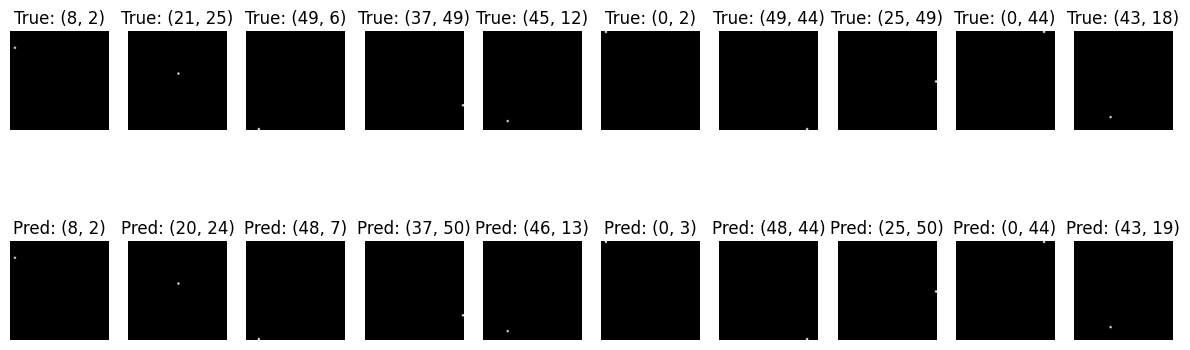

In [13]:
plot_results(images_test, labels_test, predictions)

##Plot Chart

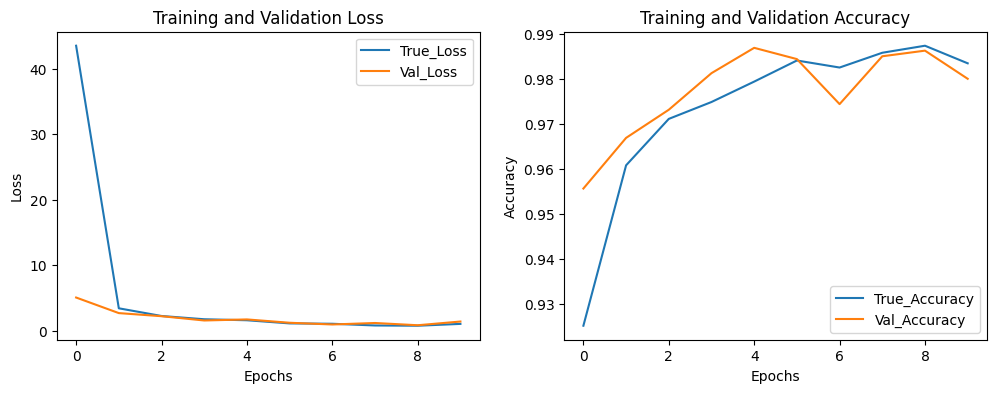

In [16]:
# Ploting the loss and accuracy over the epochs
# for both training and validation sets to understand the model's learning process
# Also checking for overfitting or underfitting in dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='True_Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='True_Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




---
* Training Loss: Indicates how well the model is fitting the training data.
*  Validation Loss: Indicates how well the model generalizes to unseen data.
---
*  Training Accuracy: The percentage of correct predictions on the training dataset.
*  Validation Accuracy: The percentage of correct predictions on the validation dataset.
---
